# Introductions

This is the first post, in hopefully a series of many posts, on how to use Python to analyze College Football data. Some of you may know me from my <a target="_blank" href="https://www.fantasyfootballdatapros.com/posts">Learn Python with Fantasy Football series</a> I wrote on my old website Fantasy Football Data Pros (which is still up, but I'm in the process of moving all of the content over to this new site). If you're wondering why you're reading about CFB on a site with the name "fantasy" in it, we're working on the name still while in this transitional period.

I've been writing programming tutorials for about 3 years now. I've learned that when writing tutorials it's important to define who your audience is beforehand and what their skill level is. This post is not targeted at complete beginners at the moment, but eventually, I will write some more basic Python tutorials for people who are just starting out. This post is better suited for those who have some coding experience, maybe some Python experience, but not much experience with either (a) Python's data science capabilities, (b) data science in general, or (c) the current tools and methods ready and available for analyzing CFB data. It's hard to tell, but I think some of you more tech savvy folks who don't know how to code still might be able to (at least) follow along with these posts until I come out with some more beginner-oriented ones covering basic Python principles. 

Anyway - I think this series may be fun. Truth be told, I'm historically more of an NFL fan than I am a College Football fan, although that's quickly changing since I graduated from college about a year ago. I know my FSU Seminoles pretty well (if you're a Florida or Miami fan, this is <i>probably</i> not the series for you (jk)), I'm familiar with all of the teams in contention for big bowl games and the playoffs, and most of the top players in the country, but to be honest, I could use some work on my CFB knowledge. In the NFL, I can name you pretty much entire starting rosters, but can't say the same for CFB. I'm still learning.

Still, that's quickly changing and I find myself more and more interested in CFB, to the point where I'm more likely to miss a Dolphins game than I am to miss a Florida State game.

So I'm doing this series with the intention of (a) feeding my growing interest in CFB, (b) exploring the current analytics landscape for CFB and maybe even do some work to expand it (my initial research tells me that the resources and content aren't as developed as the NFL space, at least on the interenet), and (c) to get more people into coding and data science by exposing it through college football.

# Data Sources

Anytime I'm exploring a new domain for data science purposes, the first thing I'm looking for is data. Free and available data. If it isn't available, it might not be worth digging into the domain until I'm able to figure out a way to access the data or collect it myself. Thankfully, I've found a couple of resources. There's a Reddit thread below which lists out many of the resources available in the CFB space: 

<a target="_blank" href="https://www.reddit.com/r/CFBAnalysis/comments/p3p22c/cfb_data_and_resources_2021_edition/">Link here</a>

There's really one data source that is putting the entire team on it's back, and it's <a target="_blank" href="https://collegefootballdata.com/">CollegeFootballData.com</a>. There's an API, it's free, and it has a Python package. The only drawback, is that the API doesn't integrate amazingly with pandas, which I may end up making some pull requests to help out in that regard. Checks most of the boxes anyway. I would encourage you to investigate it further and check out their <a href="https://api.collegefootballdata.com/api/docs/?url=/api-docs.json">API documentation after this post.</a>

The <a target="_blank" href="https://github.com/CFBD/cfbd-python">Python package</a> for interacting with the API is called `cfbd`. Before actually using it, you'll have to get your API keys by providing your email. They'll then email you an API token.

# Environment

In Python, data science code, especially in the EDA stage of the process, is typically written in an IPython / notebook environment. Stephen Wolfram describes that the main idea behind noteboks is to <i>"have an interactive document that freely mixes code, results, graphics, text and everything else".</i> These environments are perfectly suited for exploratory data analysis as they allow us to iterate easily upon data, and they also help us tell stories with data (as we are going to do throughout this series).

There's two main options for notebook environments: either Jupyter Notebooks or <a target="_blank" href="https://colab.research.google.com/">Google Colab</a>. Both are browser-based technically, but Jupyter requires some installation. I'd suggest using Google Colab because it is fully remote and requires 0 installation. I really don't want to spend too much time answering people's questions regarding an error with their installation that most of the time ends up being completely unique to their operating system / hardware. You using Google Colab is easy for you (all you need to do is login with a Google account) and easy for me (I don't have to walk you through any installation, not even installing Python).

In these notebook environments, you'll have a mix of markdown and also executable IPython cells which can be ran using the play button on the left hand side or using the keystroke combo `Shift Enter`.

When you first logged in, there should have also been a sample notebook and tutorial detailing some more features regarding Colab.

# Let's write some code!

Create a new notebook, and in the first cells let's install and import `cfbd` and start messing around and seeing what data we can find. 

In this post, we are going to examine one of the many datasets we can pull from this API, manipulate it a bit, and put together a quick visualization.

First, we install `cfbd` and `flatdict` for use in our Colab environment using pip. You'll need to do this for every new notebook you create. If you haven't already, navigate over to CollegeFootballData.com and generate your API key. 

In the second block below, your code is going to look slightly different than mine (while I've advised you guys use Colab I'm personally using Jupyter Notebook since I have to push this notebook to Git). I'm saving my environment variables in a file called `.env` and loading them with a Python package called `python-dotenv` that exposes them to whatever environment I'm doing this in. That's just to keep my API key protected since CFBD asked me to. You can just paste in your API key and directly assign it to `CFDB_API_KEY`.

In [60]:
%%capture
%pip install cfbd flatdict --quiet # install cfbd and the flatdict library in Google Colab

Below we import some libaries, including the two we installed above, and also `matplotlib` and `pandas`. I've mentioned pandas a couple times already. Some of you may have worked with it before, but <a target="_blank" href="https://pandas.pydata.org/">pandas</a> is Python's data manipulation library and is used to work with data in a rectangular format (similar to a spreadsheet). If you're unfamiliar with pandas, I highly recommend you check out their <a target="_blank" href="https://pandas.pydata.org/docs/">documentation</a> and keep it bookmarked as reference. We'll be covering a lot of concepts related to working with pandas but you may have to reference the API at times. <a target="_blank" href="https://matplotlib.org/">matplotlib</a> is Python's data visualization library. Most of the time we will be working with the `pyplot` module, but sometimes we'll be using `matplotlib` directly (usually for configuration purposes).

We also set some configuration by turning off pandas default mode of truncating columns after a certain amount, and setting a base style for our matplotlib visualizations. You can check out all the different potential styles to pass in the `style.use` function <a target="_blank" href="https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html">here</a>.

The last line below is setting our API key. As I described above, once you get your key just paste it in and assign to `CFBD_API_KEY`. No need to save it to an `.env` file as I did.

In [2]:
import cfbd
import pandas as pd
from matplotlib import pyplot as plt
import flatdict

#setting some configurations
pd.set_option('display.max_columns', None) # do not truncate columns
plt.style.use('ggplot')

from dotenv import load_dotenv; import os; load_dotenv(); #ignore this line, I'm using this to load in my personal CFBD API token
CFBD_API_KEY = os.getenv('CFBD_API_KEY') # just paste in your API Key here instead of using dotenv and the os library

Now we can start working with the CFBD API. The first three lines below is the syntax to authenticate with the API.

After that, we can pass in this `config` object, wrapped by another class called `ApiClient`, to a bunch of potential models. You can check out all the models <a target="_blank" href="https://github.com/CFBD/cfbd-python">here</a>. Eventually, we will go through all of these, but for now, we are going to focus on the `StatsApi`, which exposes advanced team game stats.

In [4]:
config = cfbd.Configuration()
config.api_key['Authorization'] = CFBD_API_KEY
config.api_key_prefix['Authorization'] = 'Bearer'

api = cfbd.StatsApi(cfbd.ApiClient(config))

Now time for the fun part. Let's pull advanced team game stats using the `get_advanced_team_game_stats` function.

We'll pull a sample first by grabbing FSU's week 3 matchup against Louisville (I promise every post won't be Florida State related, just this first one :))

I advise you to check out all of the functions available under this model linked here. It may be a good idea, in general, if you plan to follow this series, to get really familiarized with this package. It's fantastic, but also getting the data into pandas, as we'll see, can be difficult at times so understanding the schema is important.

Examine the schema below. We'll talk about how to cram this into a rectangular data format in a moment.

In [5]:
fsu_sample_week_3 = api.get_advanced_team_game_stats(
    year=2022, week=3, season_type='regular', team='Florida State'
)

print(fsu_sample_week_3)

[{'defense': {'drives': 14,
             'explosiveness': 1.1248860432868033,
             'line_yards': 4.36,
             'line_yards_total': 174.0,
             'open_field_yards': 1.325,
             'open_field_yards_total': 53,
             'passing_downs': {'explosiveness': 2.0602010870788368,
                               'ppa': 0.45641802126300773,
                               'success_rate': 0.3333333333333333},
             'passing_plays': {'explosiveness': 1.8604977395791342,
                               'ppa': 0.08428683266965475,
                               'success_rate': 0.3783783783783784,
                               'total_ppa': 3.118612808777226},
             'plays': 77,
             'power_success': 0.8333333333333334,
             'ppa': 0.2191948980260933,
             'rushing_plays': {'explosiveness': 0.7287874375909328,
                               'ppa': 0.34398485848079896,
                               'success_rate': 0.65,
                 

Let's take a debrief and talk about DataFrames. <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html">DataFrames are, from the pandas documentation</a>:

<i>Two-dimensional, size-mutable, potentially heterogeneous tabular data.</i>

<i>Data structure also contains labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.</i>

Let's break that down.

<i>Two-dimensional</i> means that it contains data organized in rows and colulmns, and the intersection of these rows and columns make cells. Similar to an Excel spreadsheet.

<i>Size-mutable</i> means that we can add and delete things off these DataFrames. The size of the DataFrame is able to be mutated (changed). (Immutability in programming refers to an object whose state cannot be changed once it is created).

<i>Potentially heterogenous</i> means we can have mixed data types, even in the same column. In contrast, `numpy`, which Pandas is built on top of, does not allow mixed types in it's primary data structure, the array. 

<i>Dict-like container for Series objects</i> tells us about the underlying structure of a DataFrame, and will help us turn the API endpoint above into a DataFrame.

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html">Series</a> are another data structure withing Pandas, except they are one-dimensional. You can think of a pandas DataFrame as just a dictionary of adjacent Series objects with column name identifiers as the keys.

For example, below shows two `Series` objects, one that contains 1-Dimensional data for pass attempts, and one that contains 1-Dimensional data for rush attempts.

In [14]:
# for example

pass_attempts = pd.Series([307, 254, 212])
rush_attempts = pd.Series([12, 34, 54])

Now let's say we wanted to combine these two Series together to form a 2-D data structure, as each of these items put together adjacently refer to a single players stats. As you can see, we'd create a dictionary with keys for column names and values of the series above. This is what is meant by <i>Dict-like container for Series objects</i>. 

In [16]:
df = pd.DataFrame({
    'Passing Attempts': pass_attempts,
    'Rush Attempts': rush_attempts
})

df

,Passing Attempts,Rush Attempts
0,307,12
1,254,34
2,212,54


So now we need to take the API endpoint above and figure out how the hell to fit that into a dictionary that can become a DataFrame.

We can start by flattening out the dictionary. That's why we installed and imported that `flatdict` library. It allows us to take a nested dictionary, flatten it, and pass in a delimiter to come up with new keys. Instead of detailing in the markdown what this function is doing, I've added comments to make things easier for me and you.

In [100]:
def generate_advanced_team_game_stats_df(team, year=2022, season_type='regular'):
    
    #grab the advancated teams data
    games = api.get_advanced_team_game_stats(team=team, year=year, season_type=season_type)
    
    #initialize empty dictionary which we will pass in to our DataFrame.
    games_df_data = dict()
    
    for game in games:
        #convert the game object to dictionary since it's something else at the moment even though it looks like one. Won't be able to access dictionary methods.
        game_dict = game.to_dict()
        #flatten the dictionary, use the delimiter .
        flattened_game_dict = flatdict.FlatDict(game_dict, delimiter='.')
        
        for k, v in flattened_game_dict.items():
            #if this is the first dict we've gone through, initialize our empty DataFrame with the correct kets
            if k not in games_df_data:
                games_df_data[k] = []
            #otherwise append. We are using a list here but we could use Series or list objects to contruct DataFrames
            games_df_data[k].append(v)
            
    return pd.DataFrame(games_df_data)

Hopefully that makes sense. At the end there, you can see that this function returns a DataFrame object.

Next, we are going to use this function to get us back DataFrames for Florida State and Florida. We're going to be taking a look at the Florida-FSU matchup this Friday and compare advanced team stats for the two teams. There are a lot of columns here, and for the sake of brevity, we are only going to be looking at one advanced stat (explosiveness). You are welcome (and encouraged) to look at other advanced stats too, though.

I'm actually fairly new to a lot of these CFB advanced stats like <a href="https://www.actionnetwork.com/ncaaf/college-football-betting-defenses-havoc-handicapping">Havoc</a>. (Another resource: Action Network has a bunch of great articles explaining a lot of these advanced stats. 

<a target="_blank" href="https://collegefootballdata.com/glossary#:~:text=Havoc%20refers%20to%20the%20percentage,losses%20%2D%20120%25">The CFBD website though, gives us all of <b>their</b> definitions which may be more useful to us:</a>

<i>Explosiveness measures the average EPA on plays which were marked as successful. It uses this site's EPA implementation (known as PPA).</i>
<i>Success Rate is an efficiency metric that determines the success of a play. Successful plays meet one of the following criteria:</i>
   <ul>
    <i>
       <li>the offense scored</li>
       <li>1st downs which gain at least 50% of the yards to go</li>
       <li>2nd downs which gain at least 70% of the yards to go</li>
    <li>3rd and 4th downs which gain at least 100% of the yards to go</li>
    </i>
    </ul>

Using the DataFrame method `head`, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html">we can view the first five rows of our DataFrame.</a> There are lots of methods we can all off DataFrames which we'll be exploring in subsequent posts.

In [112]:
fsu_df = generate_advanced_team_game_stats_df('Florida State')
uf_df = generate_advanced_team_game_stats_df('Florida')

fsu_df.head()

,game_id,season,week,team,opponent,offense.plays,offense.drives,offense.ppa,offense.total_ppa,offense.success_rate,offense.explosiveness,offense.power_success,offense.stuff_rate,offense.line_yards,offense.line_yards_total,offense.second_level_yards,offense.second_level_yards_total,offense.open_field_yards,offense.open_field_yards_total,offense.standard_downs.ppa,offense.standard_downs.success_rate,offense.standard_downs.explosiveness,offense.passing_downs.ppa,offense.passing_downs.success_rate,offense.passing_downs.explosiveness,offense.rushing_plays.ppa,offense.rushing_plays.total_ppa,offense.rushing_plays.success_rate,offense.rushing_plays.explosiveness,offense.passing_plays.ppa,offense.passing_plays.total_ppa,offense.passing_plays.success_rate,offense.passing_plays.explosiveness,defense.plays,defense.drives,defense.ppa,defense.total_ppa,defense.success_rate,defense.explosiveness,defense.power_success,defense.stuff_rate,defense.line_yards,defense.line_yards_total,defense.second_level_yards,defense.second_level_yards_total,defense.open_field_yards,defense.open_field_yards_total,defense.standard_downs.ppa,defense.standard_downs.success_rate,defense.standard_downs.explosiveness,defense.passing_downs.ppa,defense.passing_downs.success_rate,defense.passing_downs.explosiveness,defense.rushing_plays.ppa,defense.rushing_plays.total_ppa,defense.rushing_plays.success_rate,defense.rushing_plays.explosiveness,defense.passing_plays.ppa,defense.passing_plays.total_ppa,defense.passing_plays.success_rate,defense.passing_plays.explosiveness
0,401403867,None,1,Florida State,LSU,70,9,0.416423,29.149639,0.485714,1.383831,0.833333,0.194444,2.666667,96.0,0.638889,23,0.527778,19,0.219841,0.456522,1.169061,0.793206,0.541667,1.730768,0.170846,6.150439,0.472222,0.849823,0.676447,22.999200,0.500000,1.917840,60,8,0.521446,31.286784,0.500000,1.599398,0.714286,0.083333,4.033333,97.0,1.666667,40,1.000000,24,0.313022,0.500000,1.340625,1.094615,0.500000,2.311025,0.692536,16.620871,0.500000,1.566538,0.407386,14.665912,0.500000,1.621305
1,401411090,None,1,Florida State,Duquesne,74,10,0.540852,40.023038,0.662162,1.026711,1.000000,0.056604,4.764151,253.0,1.962264,104,1.735849,92,0.628861,0.766667,0.949240,0.163672,0.214286,2.214603,0.687098,36.416204,0.716981,1.069811,0.171754,3.606834,0.523810,0.877819,47,11,-0.066563,-3.128471,0.297872,1.031508,0.000000,0.241379,2.400000,70.0,0.689655,20,0.482759,14,0.123077,0.448276,1.022154,-0.372094,0.055556,1.153122,-0.210343,-6.099952,0.275862,0.710922,0.165082,2.971481,0.333333,1.458957
2,401411109,None,3,Florida State,Louisville,66,15,0.323834,21.373018,0.409091,1.686968,0.400000,0.333333,2.527273,83.0,1.333333,44,3.151515,104,0.323681,0.478261,1.448776,0.324184,0.250000,2.735015,0.157314,5.191377,0.393939,1.335368,0.490353,16.181642,0.424242,2.013454,77,14,0.219195,16.878007,0.519481,1.124886,0.833333,0.050000,4.360000,174.0,1.700000,68,1.325000,53,0.146822,0.576271,0.959830,0.456418,0.333333,2.060201,0.343985,13.759394,0.650000,0.728787,0.084287,3.118613,0.378378,1.860498
3,401411118,None,4,Florida State,Boston College,65,11,0.393571,25.582139,0.415385,1.766160,0.666667,0.085714,3.174286,111.0,1.114286,39,1.657143,58,0.054544,0.414634,1.057497,0.972743,0.416667,2.970887,0.123169,4.310927,0.400000,1.184876,0.709040,21.271212,0.433333,2.392157,63,12,0.100094,6.305951,0.412698,1.073253,1.000000,0.218750,3.156250,101.0,1.156250,37,0.031250,1,0.000697,0.500000,0.738593,0.251178,0.280000,1.981617,-0.030956,-0.990592,0.406250,0.838801,0.275902,8.001170,0.448276,1.307705
4,401411127,None,5,Florida State,Wake Forest,62,9,0.232404,14.409020,0.451613,1.276119,1.000000,0.230769,2.688462,70.0,1.000000,26,1.000000,26,0.260874,0.525000,1.125183,0.180639,0.318182,1.728925,-0.024251,-0.630522,0.384615,0.829967,0.417765,15.039541,0.500000,1.523981,85,11,0.214281,18.213858,0.447059,1.201834,0.555556,0.276596,2.834043,133.0,1.127660,53,0.680851,32,0.087980,0.433333,1.004606,0.517403,0.480000,1.629161,0.107754,5.064448,0.382979,1.062121,0

We are now going to compare, side-by-side, Florida's explosiveness ratings and Florida State's explosiveness ratings. We can do this using 4 bar charts, comparing rushing offense exp., passing offense exp., rushing defense exp., and passing defense exp.

To grab individual columns in Pandas (Series objects), we can use the syntax `df['column_name']`. Once we have the Series object, we can then call all sorts of functions on it, which includes mean, sum, standard deviation etc. Again, I'd advise you <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html" target="_blank">check out the pandas docs on Series.</a>

We will go more in-depth on visualizing data in matplotlib in further posts, but as a basic primer, we create visualizations in matplotlib by first instantiating figure objects and axes objects. You can think of the figure as the entire visualization, and the axes we create are the individual plots. We use the <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html">function</a> `plt.subplots` to do this. When we call that function we can <a target="_blank" href="https://stackabuse.com/unpacking-in-python-beyond-parallel-assignment/">unpack</a> the axes objects, based on the arguments we provide (first arg is number of rows, second arg is number of columns). We can set the size of the entire visualization by passing in a tuple to the `figsize` argument.

Once we have all our axes ready, we can call the `Axes.bar` function on all of them to create individual bar plots. 

I encourage you to check out the documentation I linked for details into the arguments of both `plt.subplots` and `Axes.bar` and such. Really for `bar`, we just pass in our `x` labels, and the heights, which is the mean output for each teams explosiveness category. The rest is styling. <a target="_blank" href="https://teamcolorcodes.com/">I pulled the team color hex codes for you using this website.</a>

We also call another function called `set_ylim` to adjust the axes scaling on the y-axis. I've added some comments below further explaining the code.

Again, if this is going over your head, we are going to be covering visualizations in a lot more depth in future posts.

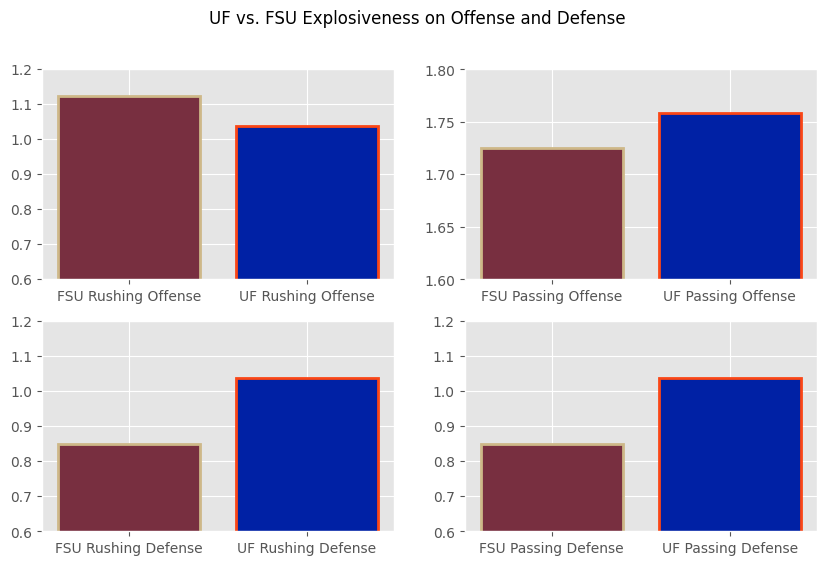

In [181]:
#creating a 2x2 visualziation.
#unpacking notation: https://stackabuse.com/unpacking-in-python-beyond-parallel-assignment/

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))

garnet = '#782f40'
gold = '#CEB888'
florida_blue = '#0021A5'
florida_orange = '#FA4616'

ax1.bar(
    x = ['FSU Rushing Offense', 'UF Rushing Offense'],
    height = [
        fsu_df['offense.rushing_plays.explosiveness'].mean(), # we can call this summary functions off series objects
        uf_df['defense.rushing_plays.explosiveness'].mean()
    ],
    color=[garnet, florida_blue], # set background color of the bars
    edgecolor=[gold, florida_orange], # set border color of the bars
    linewidth=2 # set border width for bars
);
ax1.set_ylim([0.6, 1.2]) # set y axis scaling

#repeat this process for the other 3 axes
ax2.bar(
    x = ['FSU Passing Offense', 'UF Passing Offense'],
    height = [
        fsu_df['offense.passing_plays.explosiveness'].mean(),
        uf_df['offense.passing_plays.explosiveness'].mean()
    ],
    color=[garnet, florida_blue],
    edgecolor=[gold, florida_orange],
    linewidth=2
);
ax2.set_ylim([1.6, 1.8])

ax3.bar(
    x = ['FSU Rushing Defense', 'UF Rushing Defense'],
    height = [
        fsu_df['defense.rushing_plays.explosiveness'].mean(),
        uf_df['defense.rushing_plays.explosiveness'].mean()
    ],
    color=[garnet, florida_blue],
    edgecolor=[gold, florida_orange],
    linewidth=2
);
ax3.set_ylim([0.6, 1.2])

ax4.bar(
    x = ['FSU Passing Defense', 'UF Passing Defense'],
    height = [
        fsu_df['defense.rushing_plays.explosiveness'].mean(),
        uf_df['defense.rushing_plays.explosiveness'].mean()
    ],
    color=[garnet, florida_blue],
    edgecolor=[gold, florida_orange],
    linewidth=2
);
ax4.set_ylim([0.6, 1.2])

fig.suptitle('UF vs. FSU Explosiveness on Offense and Defense'); # set title for the figure

We can see that while FSU's rushing offense is more explosive, UF's passing offense is more explosive. Just based off what I've seen from the games, this definitely seems true. Then on defense, it seems that FSU lets up a significantly less amount of explosive plays than UF.

I wish I could dig in more here but this post is getting quite long. In future posts, we'll continue exploring the CFBD API and also talk more about pandas and matplotlib.

This post got quite long, so we're going to cut it short here.

I hope this was a good and understandable introduction to how to start doing CFB analysis in Python. If you have any questions, feel free to DM me on Twitter @bendominguez011, PM me on Reddit @ <i>/u/NukishPhilosophy</i>, or shoot me an email @ ben@fantasydatapros.com.

Thanks for reading, you guys are awesome! And go Noles!